<a href="https://colab.research.google.com/github/shaqshree/WeatherforecastANDR/blob/master/Intelproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sriranjiniks","key":"0c8eeaead3821c6ebc134a4857ad8dde"}'}

In [4]:
!ls -lha kaggle.json
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list -s image


-rw-r--r-- 1 root root 68 Feb 10 13:16 kaggle.json
ref                                               title                                      size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------  ----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/pistachio-image-dataset         Pistachio Image Dataset                    27MB  2022-03-28 18:01:27           2322       1545  0.9375           
muratkokludataset/rice-image-dataset              Rice Image Dataset                        219MB  2022-04-03 02:12:00           6995       1648  0.875            
puneet6060/intel-image-classification             Intel Image Classification                346MB  2019-01-30 09:22:58          72203       1273  0.75             
vishalsubbiah/pokemon-images-and-types            Pokemon Image Dataset                       2MB  2018-12-17 01:01:39          2

In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification

!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [6]:
import os

In [7]:
os.listdir()

['.config',
 'kaggle.json',
 'seg_train',
 'intel-image-classification.zip',
 'seg_pred',
 'seg_test',
 'sample_data']

In [8]:
train ="seg_train/seg_train"
test="seg_test/seg_test"

In [9]:
import tensorflow as tf
import os 
import tensorflow.keras as keras 
import matplotlib.pyplot as plt
import numpy as np



In [10]:
os.listdir(train)

['glacier', 'buildings', 'street', 'mountain', 'forest', 'sea']

In [11]:
os.listdir(test)

['glacier', 'buildings', 'street', 'mountain', 'forest', 'sea']

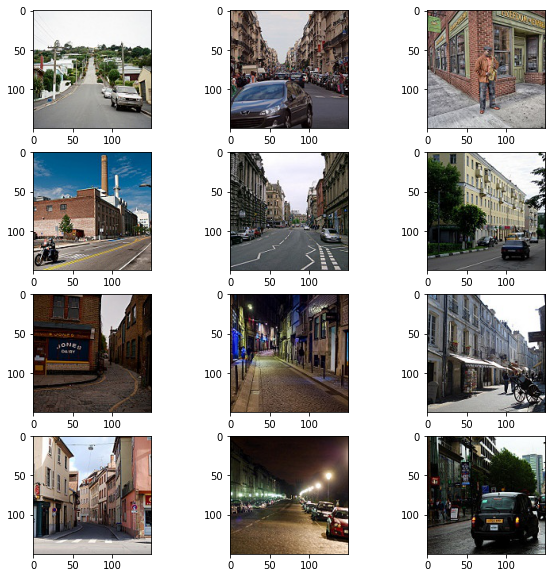

In [15]:
choice ="street"
plt.figure(figsize=(10,10))
for i in range(12):
  plt.subplot(4,3,i+1)
  path =  f"{train}/{choice}/"
  images = os.listdir(path)
  img = plt.imread(f"{path+images[i]}")
  plt.imshow(img)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:

train_aug = ImageDataGenerator(rescale = 1/255.0,
                               rotation_range=45,
                               zoom_range=0.2,
                               horizontal_flip = True 
)
     

In [17]:
test_aug = ImageDataGenerator(rescale = 1/255.0)

In [19]:
training_data = train_aug.flow_from_directory(train,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')
     

Found 14034 images belonging to 6 classes.


In [20]:
for img,label in training_data:
  print(img.shape)
  print(label.shape)
  break
     
     

(32, 224, 224, 3)
(32, 6)


In [21]:
testing_data = test_aug.flow_from_directory(test,
                                   batch_size=32,
                                   target_size=(224,224),
                                   shuffle=True,
                                   class_mode='categorical')

Found 3000 images belonging to 6 classes.


In [22]:
image,label = testing_data[0]

In [23]:
image.shape


(32, 224, 224, 3)

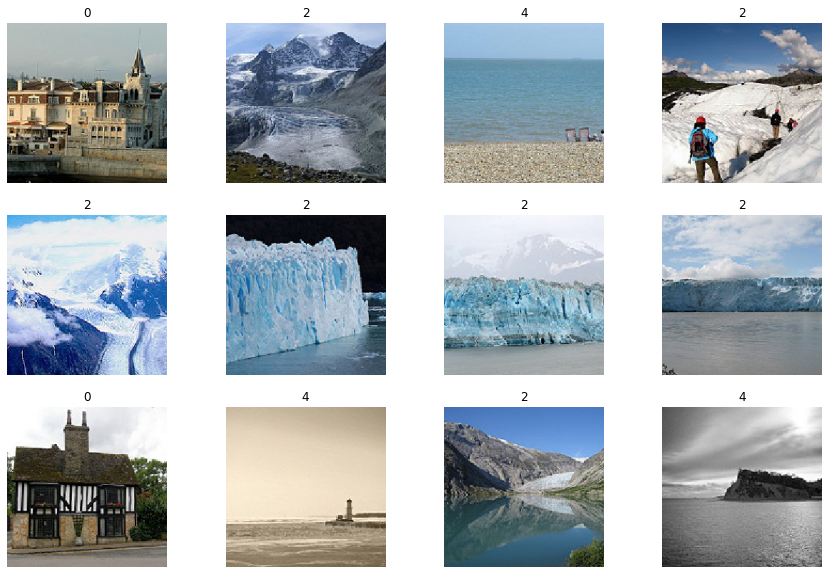

In [24]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = testing_data[i+(i*3)]
    plt.imshow(validImages[0])
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

In [25]:
data_augmentation = keras.Sequential([
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
])

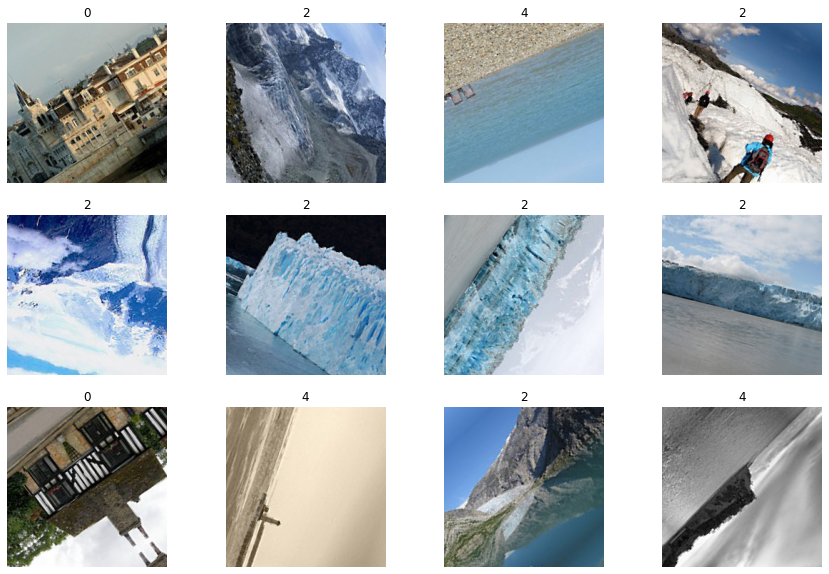

In [26]:
plt.figure(figsize=(15,10))
n = 12
for i in range(n):
    plt.subplot(3,4,i+1)
    validImages,validLabels = testing_data[i+(i*3)]
    aug_image = data_augmentation(validImages[0])
    plt.imshow(aug_image)
    decodeLabel = np.argmax(validLabels)
    plt.title(decodeLabel)
    plt.axis("off")

In [27]:
model = keras.models.Sequential()
#model.add(data_augmentation)
model.add(keras.layers.Conv2D(32,3,input_shape=(224,224,3)))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64,3,activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(6,activation="softmax"))

In [28]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['acc'])

In [31]:
history = model.fit(training_data,validation_data=testing_data,epochs=3,steps_per_epoch=100)

Epoch 1/3
  3/100 [..............................] - ETA: 5:05 - loss: 0.9461 - acc: 0.6354

KeyboardInterrupt: ignored

In [32]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.models import load_model

In [33]:

testing_image = 'seg_test/seg_test/buildings/'
random_image = os.listdir(testing_image)[7]
     

In [34]:

testing_image = 'seg_test/seg_test/buildings/'
random_image = os.listdir(testing_image)[7]
     

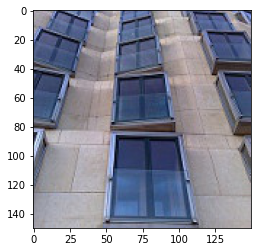

In [35]:
view = plt.imread(f"{testing_image+random_image}")
plt.imshow(view)

In [36]:
img = load_img(f"{testing_image+random_image}",target_size = (224,224,3))
     

In [37]:
x = img_to_array(img)


In [38]:
x.shape


(224, 224, 3)

In [39]:
x = np.expand_dims(x,axis=0)


In [40]:
x.shape


(1, 224, 224, 3)

In [42]:

target = model.predict(x)
target = np.argmax(target)

1/1 [==============================] - 0s 166ms/step


In [43]:

class_names = ['buildings','forest','glacier','sea','street','mountain']
class_names.sort()

In [44]:
class_names[target]


'buildings'